In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('placement.csv')

X = df.iloc[:,0:1].values
y = df.iloc[:,-1].values

In [22]:
import numpy as np



# Normalize features
X_normalized = (X - np.mean(X)) / np.std(X)

# Add bias term to X
X_bias = np.c_[np.ones((X_normalized.shape[0], 1)), X_normalized]

# Initial values
theta = np.zeros(X_bias.shape[1])  # Parameters
alpha = 0.01  # Learning rate
lambda_ = 0.1  # Regularization parameter
num_iters = 1000  # Number of iterations

# Implement gradient descent with regularization
def hypothesis(theta, X):
    """
    Hypothesis function h(theta, X).
    """
    return np.dot(X, theta)

def cost_function(theta, X, y, lambda_):
    """
    Cost function with regularization.
    """
    m = len(y)
    reg_term = (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))
    return (1 / (2 * m)) * np.sum(np.square(hypothesis(theta, X) - y)) + reg_term

def gradient_descent_regularized(X, y, theta, alpha, lambda_, num_iters):

    m = len(y)
    J_history = []

    for _ in range(num_iters):
        theta -= (alpha / m) * (np.dot(X.T, (hypothesis(theta, X) - y)) + lambda_ * np.hstack([0, theta[1:]]))
        J_history.append(cost_function(theta, X, y, lambda_))

    return theta, J_history

# Apply gradient descent
theta_final, J_history = gradient_descent_regularized(X_bias, y, theta, alpha, lambda_, num_iters)

# Display final parameters
print("Final Parameters (theta):", theta_final)

# Predictions
predictions = hypothesis(theta_final, X_bias)

# Mean squared error
mse = np.mean((predictions - y) ** 2)
print("Mean Squared Error:", mse)


Final Parameters (theta): [2.99592066 0.60727142]
Mean Squared Error: 0.10680086345193128


In [23]:
def gradient_descent_regularized(X, y, theta, alpha, lambda_, num_iters):

    m = len(y)
    J_history = []

    for i in range(num_iters):
        theta -= (alpha / m) * (np.dot(X.T, (hypothesis(theta, X) - y)) + lambda_ * np.hstack([0, theta[1:]]))
        if i % 100 == 0:
            cost = cost_function(theta, X, y, lambda_)
            print(f'Cost at iteration {i}: {cost}')
        J_history.append(cost_function(theta, X, y, lambda_))

    return theta, J_history

# Apply gradient descent
theta_final, J_history = gradient_descent_regularized(X_bias, y, theta, alpha, lambda_, num_iters)


Cost at iteration 0: 0.053492626196265304
Cost at iteration 100: 0.05349261880733609
Cost at iteration 200: 0.053492617817408855
Cost at iteration 300: 0.05349261768478395
Cost at iteration 400: 0.053492617667015616
Cost at iteration 500: 0.053492617664635096
Cost at iteration 600: 0.05349261766431619
Cost at iteration 700: 0.053492617664273455
Cost at iteration 800: 0.05349261766426772
Cost at iteration 900: 0.05349261766426697


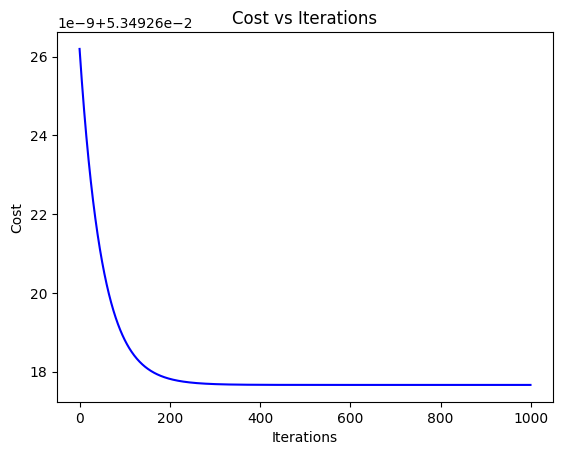

In [24]:
import matplotlib.pyplot as plt

# Plot cost vs iterations curve
plt.plot(range(num_iters), J_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()


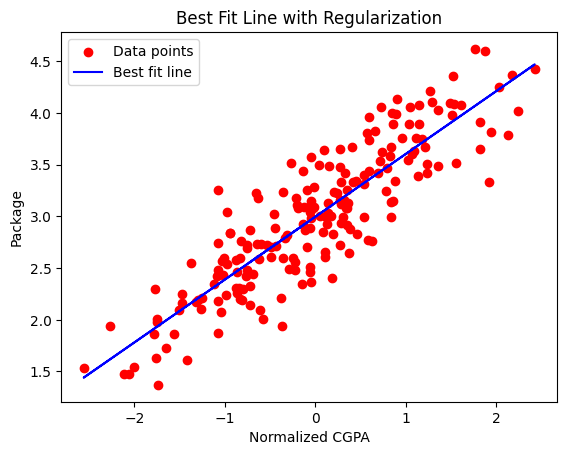

In [25]:
import matplotlib.pyplot as plt

# Plot data points
plt.scatter(X_normalized, y, color='red', label='Data points')

# Plot best fit line
plt.plot(X_normalized, X_bias.dot(theta_final), color='blue', label='Best fit line')

plt.xlabel('Normalized CGPA')
plt.ylabel('Package')
plt.title('Best Fit Line with Regularization')
plt.legend()
plt.show()
